<a href="https://colab.research.google.com/github/yoon0416/python/blob/main/1128%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **로지스틱 회귀분석**
- 로지스틱 회귀분석의 종속변수는 0~1사이의 값을 지님
- 로지스틱 회귀분석의 종속변수는 범위에 제한이 있음
- 어떤 사건이 발생하면 종속변수가 1, 발생하지 않으면 종속변수가 0이다

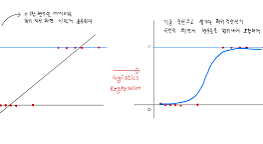

오즈비: 사건이 발생할 확률이 발생하지 않을 확률에 비해 몇 배나 높은지를 의미
1. 선형 회귀분석과 같이 p-값 확인
2. 오즈비를 구해 각 독립변수가 종속변수를 1로 만들 확률을 비교

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

sales = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0]
price = [1500,2000,5000,3000,3500,2500,4000,4500,3000,4500,4000,4500,5500,6500,5000,3500,7000]
data = {'sales':sales, 'price':price}
df = pd.DataFrame(data)

logis = sm.Logit.from_formula('sales ~ price', data=df).fit()
print(logis.summary())
print('OR')
print(np.exp(logis.params))

Optimization terminated successfully.
         Current function value: 0.430873
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  sales   No. Observations:                   17
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.3768
Time:                        01:33:05   Log-Likelihood:                -7.3248
converged:                       True   LL-Null:                       -11.754
Covariance Type:            nonrobust   LLR p-value:                  0.002917
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5752      3.300      1.993      0.046       0.108      13.042
price         -0.0016      0.

- p-값: 독립변수 price 0.04로 유의한 변수 (0.05 미만)
- y절편 intercept p-값도 0.046
- 변수 price의 오즈비 0.998433이므로 가격을 올렸을 때 판매될 가능성이 판매되지 않을 가능성의 0.998433배
- 따라서 가격을 내려야 판매 가능성이 조금이라도 높아진다는 결론

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

data2 = {
    'study_time' : [2,3,5,6,7,8,1,4,9,10],
    'pass_prob' : [0,0,0,1,1,1,0,0,1,1]
}

df = pd.DataFrame(data2)

logis = sm.Logit.from_formula('pass_prob ~ study_time', data=df).fit()
print(logis.summary())
predicted_prob = logis.predict(pd.DataFrame({'study_time':[6]}))
print('공부 시간이 6시간일 때 합격할 확률', predicted_prob[0])
print()

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              pass_prob   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                   1.000
Time:                        01:50:51   Log-Likelihood:            -3.5527e-15
converged:                      False   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                 0.0001966
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -395.9301   1.21e+09  -3.26e-07      1.000   -2.38e+09    2.38e+09
study_time    71.5368   2.03e+08   3.53e-07      1.000   -3.97e+0

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

이 경고는 로지스틱 회귀 모델이 최적의 해를 찾기 위해 설정된 최대 반복 횟수 내에서 수렴하지 못했음을 의미합니다.



---



In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

타이타닉 탑승자 데이터의 로지스틱 회귀분석

In [ ]:
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder #사이킷런

encoder = LabelEncoder()
encoder.fit(titanic['sex'])
sex = encoder.transform(titanic['sex'])
titanic['sex'] = sex

model = sm.Logit.from_formula('survived ~ pclass + sex + age + sibsp + parch + fare', data=titanic)
logit = model.fit()
print(logit.summary())


print("OR")
print(np.exp(logit.params))

Optimization terminated successfully.
         Current function value: 0.445244
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.3408
Time:                        02:04:07   Log-Likelihood:                -317.90
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 5.727e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3890      0.604      8.926      0.000       4.206       6.572
pclass        -1.2422      0.

- 독립변수 중 p값이 0.05 미만 pclass, sex, age, sibsp
- 변수의 게수가 모두 음수이므로 독립변수의 값이 증가할 때 생존 가능성이 낮은 것으로 판단
1. 탑승 클래스의 숫자가 높을수록 생존율 낮음
2. 나이가 많을수록 생존율 낮음
3. 자녀나 배우자의 수가 많을수록 생존율 낮음
4. 유의한 독립변수 중 age의 오즈비가 가장 큼, sex의 오즈비가 가장 작음
5. 남성의 생존화귤ㄹ이 여서으이 0.07배로 매우 작음